In [3]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from skimage import color,feature,io,util, measure, filters
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
filename2 ="distance_test.png"
filename="calibresult.png"
def measure1():
    print(os.getcwd())
    cap = cv2.VideoCapture(0)
    ret=0
    while (not ret):
        # Capture frame-by-frame
        ret, frame = cap.read()
        # cv2.imshow('LIVE FRAME!', frame)
        # Save it to some location
    cv2.imwrite(filename, frame)
measure1()

/home/mirondebian/Documents/github/calibration


In [4]:
import os
import numpy as np
import cv2 as cv
import glob
# termination criteria
def calibrate():
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((9*7,3), np.float32)
    objp[:,:2] = np.mgrid[0:7,0:9].T.reshape(-1,2)
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.
    directory="./data/"
    images=[]
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            print(f)
            images.append(f)
    found_imgs, imgs_counter = 0, 0

    for fname in images:
        img = cv.imread(fname)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        # Find the chess board corners
        ret, corners = cv.findChessboardCorners(gray, (7,9), None)
        # If found, add object points, image points (after refining them)
        if ret == True:
            objpoints.append(objp)
            corners2 = cv.cornerSubPix(gray,corners, (7,9), (-1,-1), criteria)
            imgpoints.append(corners2)
            found_imgs += 1
            # Draw and display the corners
            cv.drawChessboardCorners(img, (7,9), corners2, ret)
            # cv.imshow('img', img)
            # cv.waitKey(500)

    cv.destroyAllWindows()

    print("Checker board detected {}/{}".format(found_imgs, imgs_counter))
    objpoints, imgpoints = np.array(objpoints, dtype=np.float32), np.array(imgpoints, dtype=np.float32)
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    print('Camera Matrix', mtx)
    print('Distortion Mat', dist)

    img = cv.imread('./data/checkerboard_101.png')
    h,  w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # undistort
    dst = cv.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    cv.imwrite('calibresult.png', dst)

    mean_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
        mean_error += error
    print( "total error: {}".format(mean_error/len(objpoints)) )
calibrate()


./data/checkerboard_132.png
./data/checkerboard_116.png
./data/checkerboard_113.png
./data/checkerboard_131.png
./data/checkerboard_108.png
./data/checkerboard_114.png
./data/checkerboard_104.png
./data/checkerboard_115.png
./data/checkerboard_138.png
./data/checkerboard_140.png
./data/checkerboard_117.png
./data/checkerboard_101.png
./data/checkerboard_144.png
./data/checkerboard_127.png
./data/checkerboard_119.png
./data/checkerboard_139.png
./data/checkerboard_134.png
./data/checkerboard_126.png
./data/checkerboard_124.png
./data/checkerboard_103.png
./data/checkerboard_133.png
./data/checkerboard_130.png
./data/checkerboard_106.png
./data/checkerboard_118.png
./data/checkerboard_111.png
./data/checkerboard_142.png
./data/checkerboard_105.png
./data/checkerboard_135.png
./data/checkerboard_123.png
./data/checkerboard_136.png
./data/checkerboard_141.png
./data/checkerboard_109.png
./data/checkerboard_137.png
./data/checkerboard_122.png
./data/checkerboard_143.png
./data/checkerboard_

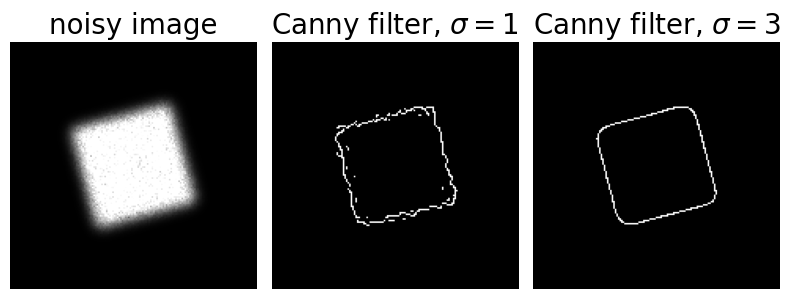

In [5]:
# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant')
image = ndi.gaussian_filter(image, 4)
image = util.random_noise(image, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

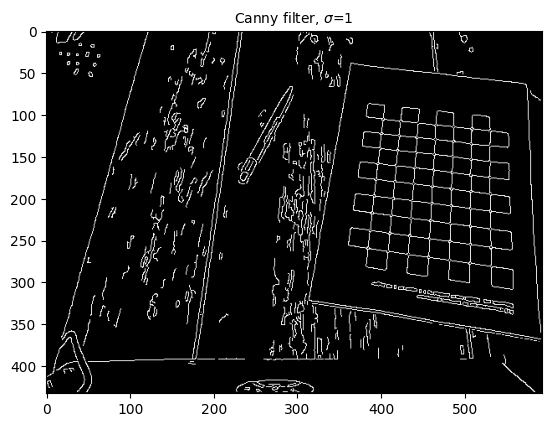

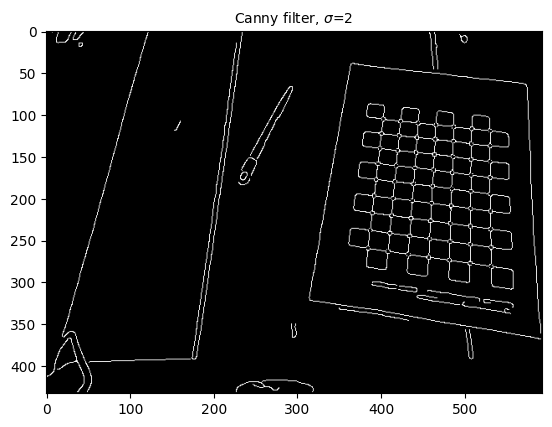

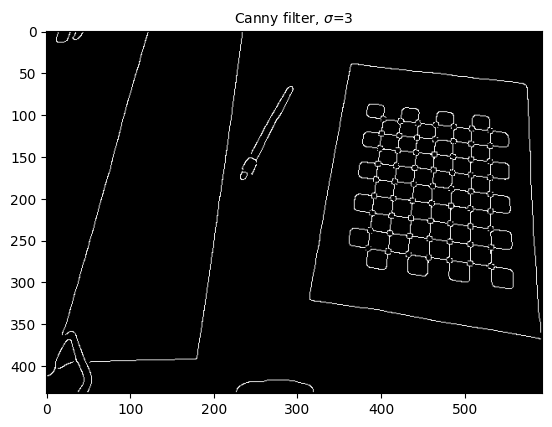

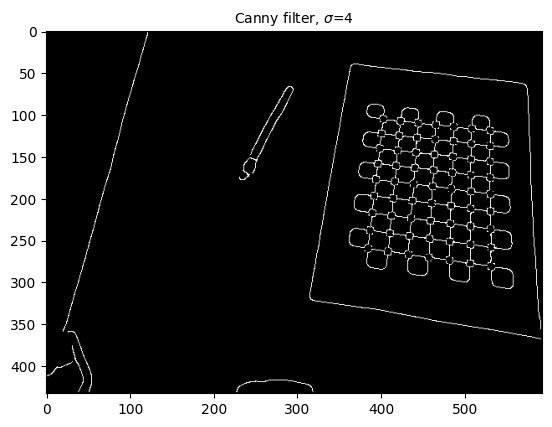

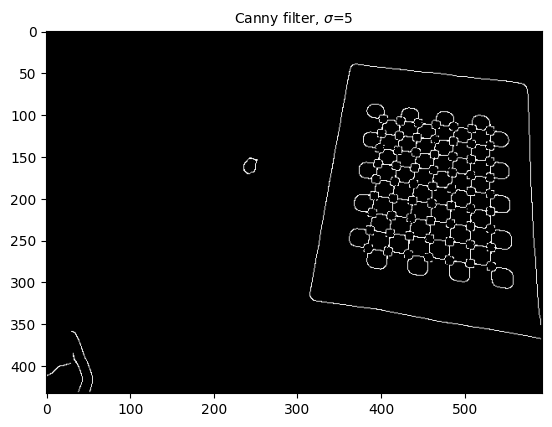

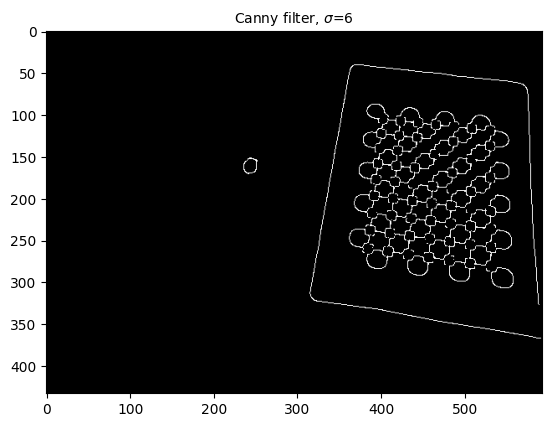

In [6]:
image=io.imread(filename)
image=color.rgb2gray(image)

# Compute the Canny filter for two values of sigma
edges_list=[]
sigmas=[1,2,3,4,5,6]
for sigma in sigmas:
    edges_list.append(feature.canny(image,sigma=sigma))


# display results
plt.imshow(image, cmap='gray')
plt.title('noisy image', fontsize=20)

for i in range(0,len(sigmas)):
    plt.imshow(edges_list[i], cmap='gray')
    plt.title(r'Canny filter, $\sigma$'+"="+str(sigmas[i]), fontsize=10)
    plt.show()

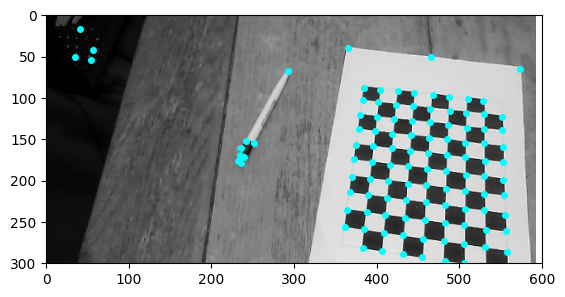

In [7]:
import skimage
from skimage import io, color, morphology, transform, data, draw, feature
from skimage.feature import *
import matplotlib.pyplot as plt


image = io.imread(filename)
image = color.rgb2gray(image)
something:np.ndarray = corner_harris(image, k=0.01, eps=0, sigma=1)
# plt.title("something")
# plt.imshow(something)
# plt.show()
coords = corner_peaks(corner_harris(image), min_distance=3, threshold_rel=0.01)
coords_subpix = corner_subpix(image, coords, window_size=10)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=4)
# plt.show()
# ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 600, 300, 0))
plt.show()

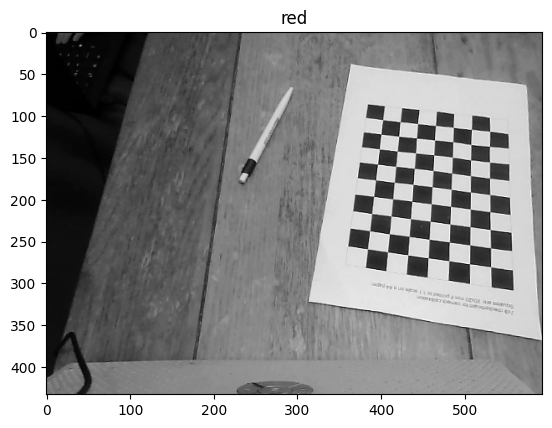

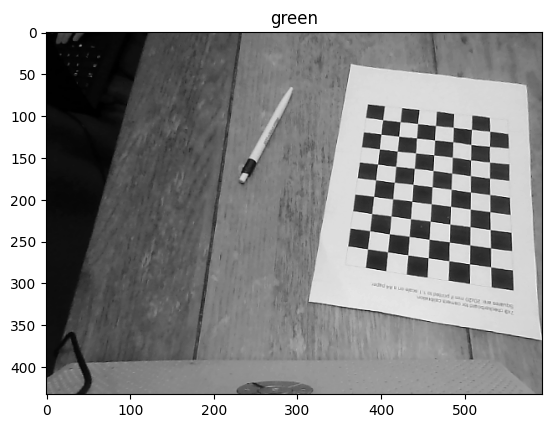

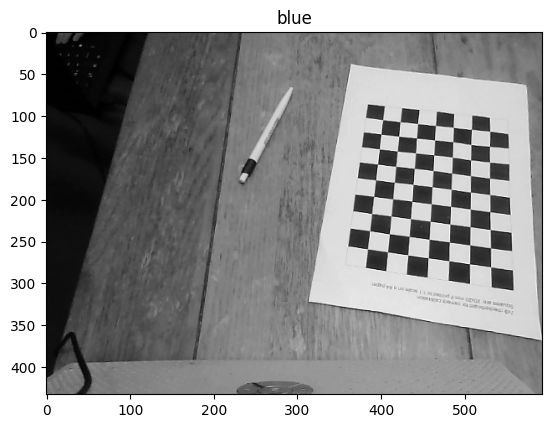

[0.1303768382352941, 0.27823223039215683, 0.4299785539215686, 0.6867800245098039]
[0, 0.1303768382352941, 0.27823223039215683, 0.4299785539215686, 0.6867800245098039, 1]


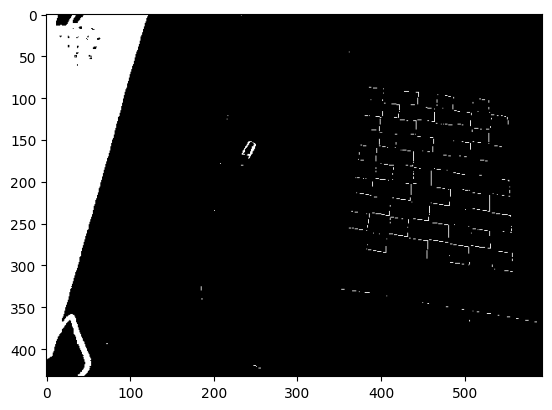

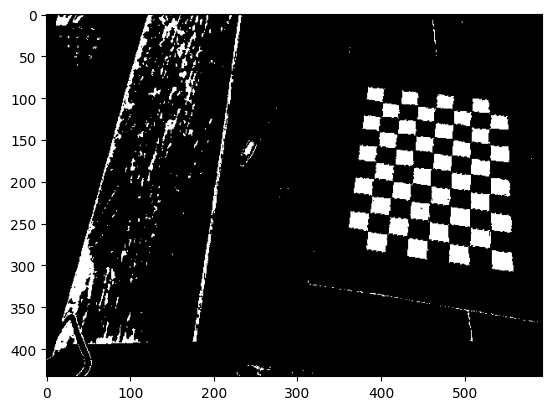

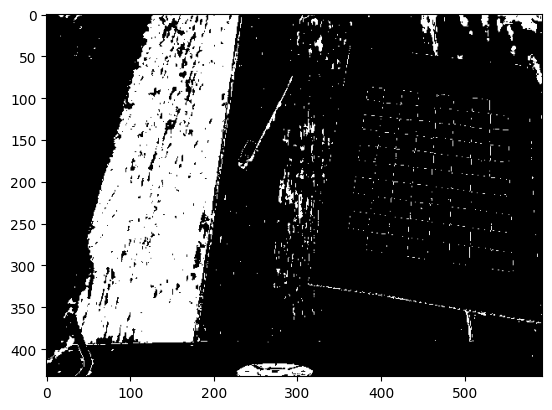

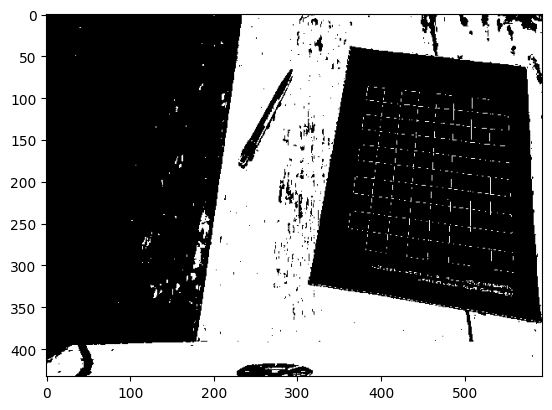

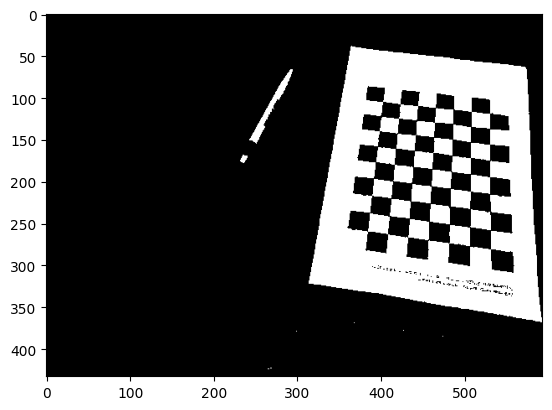

In [8]:
from skimage import filters
img = io.imread(filename)
plt.set_cmap("gray")
img_red = img[:, :, 0]
img_green = img[:, :, 1]
img_blue = img[:, :, 2]
img_gray = color.rgb2gray(img)
plt.title("red")
plt.imshow(img_red)
plt.show()
plt.title("green")
plt.imshow(img_green)
plt.show()
plt.title("blue")
plt.imshow(img_blue)
plt.show()

count = 5  # 5 takes about 10 seconds
thresholds: np.ndarray = filters.threshold_multiotsu(img_gray, classes=count)
thresholds: list = thresholds.tolist()
print(thresholds)
thresholds.insert(0, 0)
thresholds.append(1)
print(thresholds)
for i in range(len(thresholds)-1):
    img_thing = img_gray >= thresholds[i]
    img_thing2 = img_gray < thresholds[i+1]
    img_thing3 = img_thing & img_thing2
    plt.imshow(img_thing3, cmap="gray")
    plt.show()

94


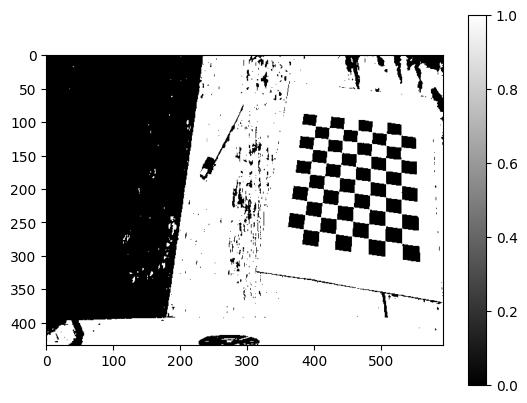

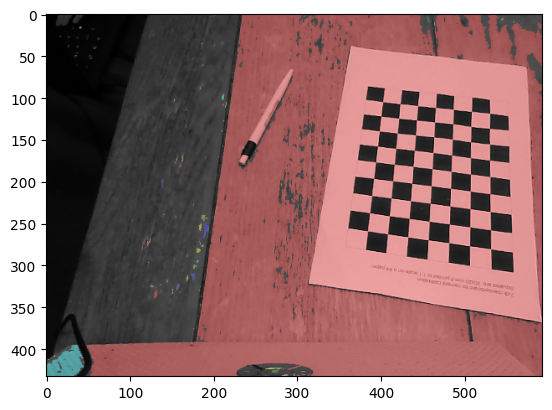

orientation 0 is 90°.
 -0.2 is about 75° and 0.2 is about 105°


In [9]:
thresh=filters.threshold_otsu(img_gray)
binary= img_gray > thresh
plt.imshow(binary,cmap="gray")
plt.colorbar()
label,num= measure.label(binary,return_num=True)
regions=color.label2rgb(label,img)
print(num)
plt.show()
plt.imshow(regions)
plt.show()
print("orientation 0 is 90°.\n -0.2 is about 75° and 0.2 is about 105°")

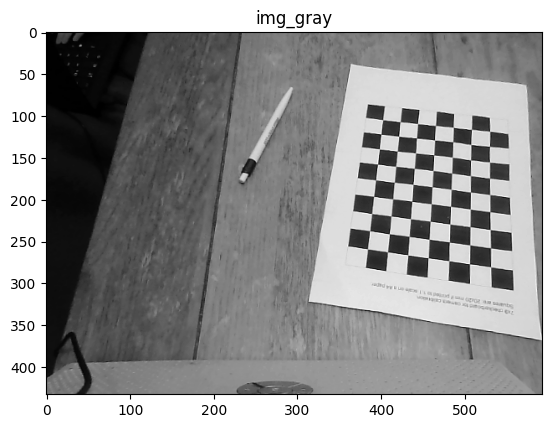

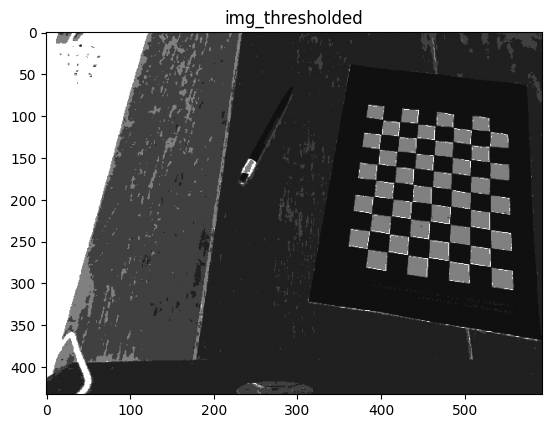

length= 433


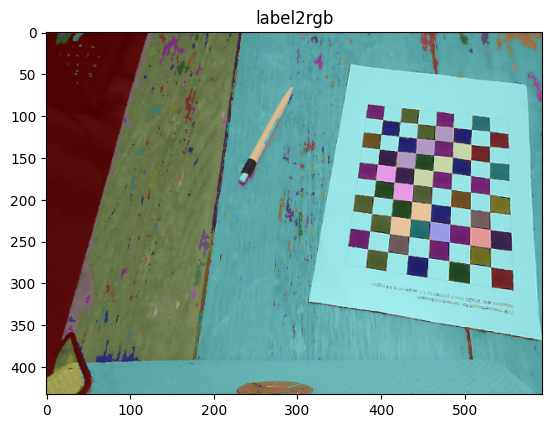

In [10]:
# segment image regions
plt.imshow(img_gray)
plt.title("img_gray")
plt.show()
img_thresholded = np.zeros((img_gray.shape))
for i in range(len(thresholds)-1):
    img_thresholded_1 = img_gray >= thresholds[i]
    img_thresholded_2 = img_gray < thresholds[i+1]
    img_thresholded = img_thresholded+(img_thresholded_1 & img_thresholded_2)
    img_thresholded *= 2
trinary = img_gray > thresholds[1]
trinary = trinary*2
trinary += img_gray > thresholds[0]
plt.imshow(img_thresholded, cmap="gray")
plt.title("img_thresholded")
plt.show()
label, num = measure.label(img_thresholded, return_num=True)
regions = color.label2rgb(label, img_gray)
plt.imshow(regions)
plt.title("label2rgb")
print("length=", len(regions))

In [11]:
# magic=20
# fp_ellipse=morphology.ellipse(magic,magic-5,dtype=capacitors.dtype)
# print(fp_ellipse.shape)
# img_morphed=morphology.opening(capacitors,fp_ellipse)
# plt.imshow(capacitors)
# plt.show()
# plt.imshow(img_morphed,cmap="gray")
# plt.show()

593


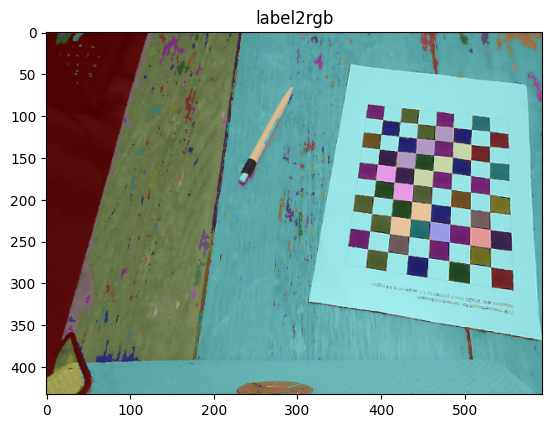

2169


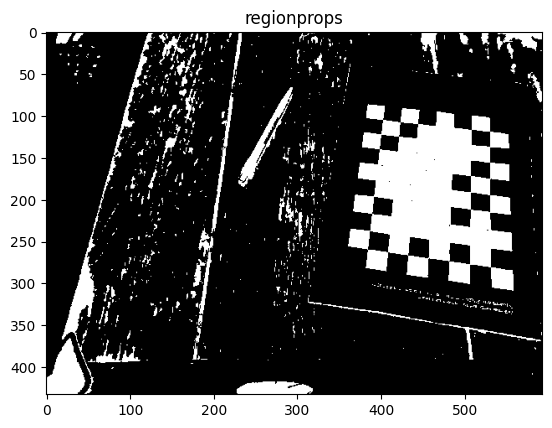

In [12]:
label = measure.label(img_thresholded)
print(len(label[0]))
img_colorcoded = color.label2rgb(label, img_gray)
plt.imshow(img_colorcoded)
plt.title("label2rgb")
plt.show()

regions = measure.regionprops(label)
print(len(regions))
some_img = np.zeros(img_gray.shape)
for region in regions:
    if region.area <9000:
        coords = region.coords
        for y, z in coords:
            some_img[y, z] = 1
plt.imshow(some_img)
plt.title("regionprops")
plt.show()

^Das Bild sieht zwar sehr gut aus. der Stift wird allerdings nicht wirklich erkannt. Er besteht hier aus mehreren Regionprops und kann daher nicht automatisch erkannt werden.

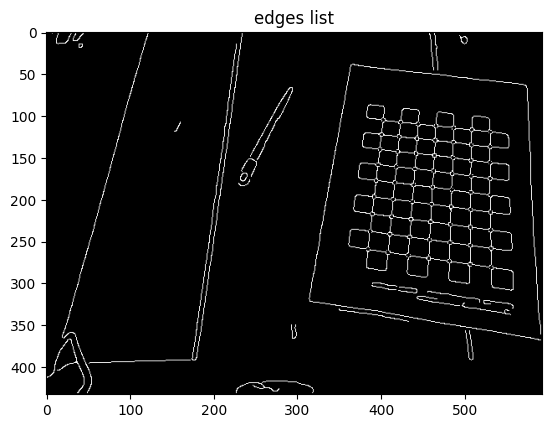

shape= (433, 593)
(256769,)
[[0.001 0.001 0.001]
 [0.001 0.001 0.001]
 [0.001 0.001 0.001]]
(433, 593)
593
(17, 15)
5


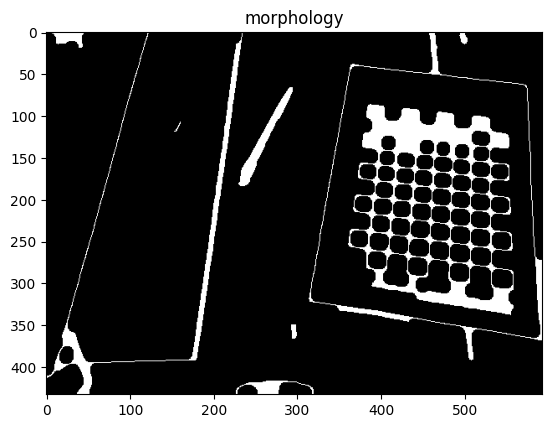

9


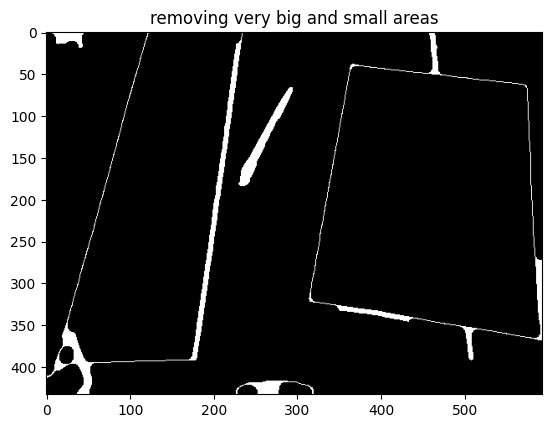

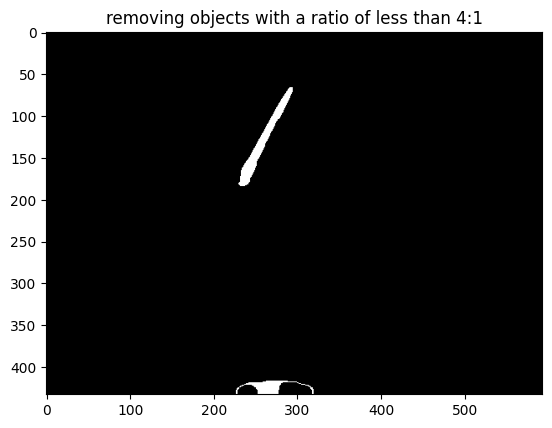

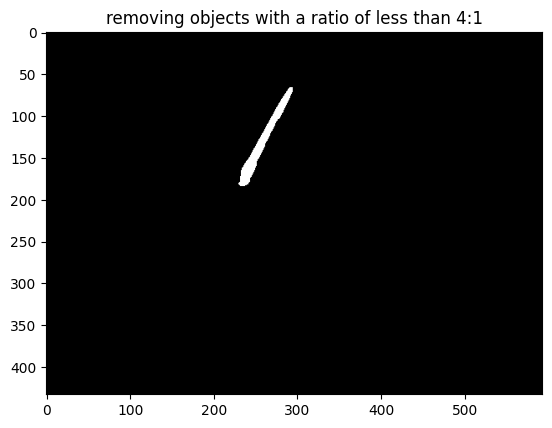

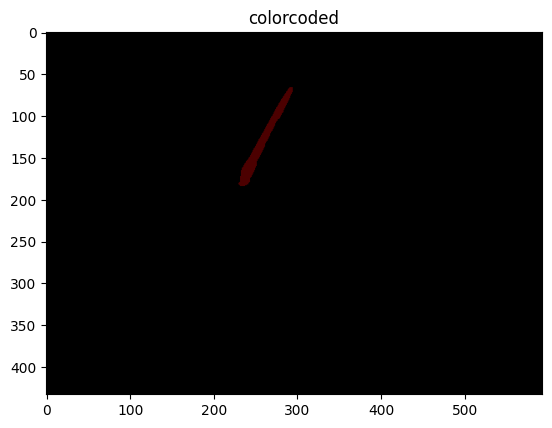

pixel_per_cm= 10.85634844514219
Länge= 13.691588859637879


In [65]:
img: np.ndarray = edges_list[1]
plt.imshow(img)
plt.title("edges list")
plt.show()

shape = img.shape
print("shape=", shape)
img = img.reshape(shape[0]*shape[1])
plt.set_cmap("gray")
print(img.shape)
img = [1 if x != False else 0.001 for x in img]
img = np.array(img)
img = img.reshape(shape)
print(img[:3, :3])
# img = 1-img
print(img.shape)
label = measure.label(img)
print(len(label[0]))
img_colorcoded = color.label2rgb(label, img)
# plt.imshow(img_colorcoded)
# plt.colorbar()
# plt.show()

# closing
magic=7
img=edges_list[1]
fp_ellipse = morphology.ellipse(magic, magic+1, dtype="bool")
print(fp_ellipse.shape)
for i in range(6):
    img = morphology.closing(img, fp_ellipse)
print(i)
# img = morphology.dilation(img)
plt.imshow(img)
plt.title("morphology")
plt.show()

# a region analysis
label = measure.label(img)
regions = measure.regionprops(label)
print(len(regions))
img = np.zeros(img.shape)
x = 0
for region in regions:
    if region.area < 9000 and region.area > 200:
        x += 1
        coords = region.coords
        for y, z in coords:
            img[y, z] = 1
plt.imshow(img)
plt.title("removing very big and small areas")
plt.show()

label = measure.label(img)
regions = measure.regionprops(label)
img = np.zeros(img.shape)
for region in regions:
    region:measure._regionprops.RegionProperties=region
    if region.axis_major_length/region.axis_minor_length >4:
        x += 1
        coords = region.coords
        for y, z in coords:
            img[y, z] = 1
plt.imshow(img)
plt.title("removing objects with a ratio of less than 4:1")
plt.show()

label = measure.label(img)
regions = measure.regionprops(label)
img = np.zeros(img.shape)
for region in regions:
    region:measure._regionprops.RegionProperties=region
    if region.solidity >0.5:
        x += 1
        coords = region.coords
        for y, z in coords:
            img[y, z] = 1
plt.imshow(img)
plt.title("removing objects with a ratio of less than 4:1")
plt.show()

label = measure.label(img)
regions = measure.regionprops(label)
img = np.zeros(img.shape)
# for region in regions:
#     for prop in region:
#         print(prop, region[prop])
#         pass
img_colorcoded = color.label2rgb(label, img)
plt.imshow(img_colorcoded)
plt.title("colorcoded")
plt.show()
with open("pixel_per_cm.txt") as file:
    pixel_per_cm=float(file.read())
print("pixel_per_cm=",pixel_per_cm)
for region in regions:
    print("Länge=",region.major_axis_length/pixel_per_cm)